<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Image/Test_Stitch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [484]:
!pip install opencv-python

In [485]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [486]:
image_set_dir = "C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\"
image_set_prefix = 'Test_Neuron1'

os.chdir(image_set_dir)

tif_list=list()
for dir,root,files in os.walk(image_set_dir):
    for f in files:
        if 'CH4.tif' in f:
            tif_list.append(os.path.join(dir,f))


In [487]:
pd_dict = {'file_loc': [t for t in tif_list],
           'xy': [t.split("_")[-3] for t in tif_list],
           'z': [t.split("_")[-2] for t in tif_list]}
image_df = pd.DataFrame(pd_dict)

display(image_df)


,file_loc,xy,z
0,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z001
1,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z002
2,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z003
3,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z004
4,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00001,Z005
...,...,...,...
2845,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z110
2846,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z111
2847,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z112
2848,C:\Users\dennis.tabuena\Dropbox (Gladstone)\0_...,00025,Z113


In [488]:
!pip install stitching
from stitching import Stitcher


['Z001', 'Z002', 'Z003', 'Z004', 'Z005', 'Z006', 'Z007', 'Z008', 'Z009', 'Z010', 'Z011', 'Z012', 'Z013', 'Z014', 'Z015', 'Z016', 'Z017', 'Z018', 'Z019', 'Z020', 'Z021', 'Z022', 'Z023', 'Z024', 'Z025', 'Z026', 'Z027', 'Z028', 'Z029', 'Z030', 'Z031', 'Z032', 'Z033', 'Z034', 'Z035', 'Z036', 'Z037', 'Z038', 'Z039', 'Z040', 'Z041', 'Z042', 'Z043', 'Z044', 'Z045', 'Z046', 'Z047', 'Z048', 'Z049', 'Z050', 'Z051', 'Z052', 'Z053', 'Z054', 'Z055', 'Z056', 'Z057', 'Z058', 'Z059', 'Z060', 'Z061', 'Z062', 'Z063', 'Z064', 'Z065', 'Z066', 'Z067', 'Z068', 'Z069', 'Z070', 'Z071', 'Z072', 'Z073', 'Z074', 'Z075', 'Z076', 'Z077', 'Z078', 'Z079', 'Z080', 'Z081', 'Z082', 'Z083', 'Z084', 'Z085', 'Z086', 'Z087', 'Z088', 'Z089', 'Z090', 'Z091', 'Z092', 'Z093', 'Z094', 'Z095', 'Z096', 'Z097', 'Z098', 'Z099', 'Z100', 'Z101', 'Z102', 'Z103', 'Z104', 'Z105', 'Z106', 'Z107', 'Z108', 'Z109', 'Z110', 'Z111', 'Z112', 'Z113', 'Z114']


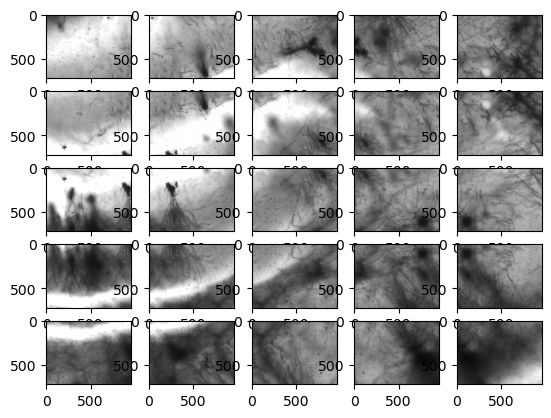

In [489]:
z_planes = sorted(list(set(image_df['z'])))
print(z_planes)

for cur_z in [z_planes[15]]:
    single_plane_images = image_df['file_loc'][[cur_z in z for z in image_df['z']]].values
image_data_list = list()
for path in single_plane_images:
    image_data =cv2.imread(path)
    image_data_list.append(image_data)
order = np.array(list(range(0,5,1)) + list(range(9,4,-1)) + list(range(10,15,1)) + list(range(19,14,-1)) + list(range(20,25,1)))
image_data_list_sorted = [image_data_list[o] for o in order]

fig,ax=plt.subplots(5,5)
ax = ax.flatten()
for i,f in enumerate(image_data_list_sorted):
    ax[i].imshow(f)

In [490]:
# from stitching.images import Images
# paths = single_plane_images
# images = Images.of(paths)

In [491]:
subset = image_data_list

In [492]:
# def plus_mask(img,n=.35,rs=None):
#     if rs is None:
#         rs = img.shape[:2]
#     mask = np.ones_like(img[:,:,0])
#     m_shape = np.shape(mask)
#     mask[int(m_shape[0]*n):int(m_shape[0]*(1-n)),:] = 0
#     mask[:,int(m_shape[1]*n):int(m_shape[1]*(1-n))] = 0
#     # mask[int(m_shape[0]*n):int(m_shape[0]*(1-n)),int(m_shape[1]*n):int(m_shape[1]*(1-n))] = 0
#     mask = cv2.resize(mask, (rs[1],rs[0]))
#     return mask.astype(int)

# fig,ax=plt.subplots(1,figsize=(1,1))
# plt.imshow(plus_mask(img,n=.35))

In [493]:
# [:-1]
# len(subset)
# single_plane_images = single_plane_images[:-1]
# len(subset)

In [494]:
# from stitching.images import Images
# img = Images.of(subset, medium_megapix=0.96, low_megapix=0.1, final_megapix=-1)
# medium_imgs = list(img.resize(Images.Resolution.MEDIUM))
# subset = medium_imgs

# from stitching.feature_detector import FeatureDetector
# finder = FeatureDetector(detector='sift', nfeatures=500)

# features = [finder.detect_features(img, plus_mask(img,n=.35) ) for img in subset]

# from stitching.feature_matcher import FeatureMatcher
# matcher = FeatureMatcher()
# matches = matcher.match_features(features)
# matcher.get_confidence_matrix(matches)
# conf_mat = matcher.get_confidence_matrix(matches)

# fig,ax=plt.subplots(5,5,figsize=(8,8))
# ax = ax.flatten()
# for i,(img,feat) in enumerate(zip(subset,features)):
#     img_h = img.copy()
#     img_h[:,:,2] = plus_mask(img,n=.35)*255
#     ax[order[i]].imshow(img_h)
#     ax[order[i]].set_xticks([])
#     ax[order[i]].set_yticks([])
#     for k in feat.keypoints:
#         ax[order[i]].scatter(k.pt[0],k.pt[1],s=1,color='m')
#         ax[order[i]].set_title(i)


# conf_mat = matcher.get_confidence_matrix(matches)
# conf_mat[conf_mat==0]=np.nan
# fig,ax=plt.subplots(1,figsize=(5,5))
# cb=ax.imshow(conf_mat)
# plt.colorbar(cb)
# ax.grid('on')
# np.nanmin(conf_mat,1)

# from stitching.subsetter import Subsetter
# subsetter = Subsetter()
# dot_notation = subsetter.get_matches_graph([str(i) for i in range(25)], matches)
# print(dot_notation)



In [495]:

# fig,ax=plt.subplots(5,5,figsize=(8,8))
# ax = ax.flatten()
# for i,img in enumerate(warped_final_imgs):
#     ax[order[i]].imshow(img)
#     ax[order[i]].set_xticks([])
#     ax[order[i]].set_yticks([])
#     ax[order[i]].set_title(i)

In [496]:
# def plot_image(img, figsize_in_inches=(5,5)):
#     fig, ax = plt.subplots(figsize=figsize_in_inches)
#     ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.show()

# def plot_images(imgs, figsize_in_inches=(5,5)):
#     fig, axs = plt.subplots(1, len(imgs), figsize=figsize_in_inches)
#     for col, img in enumerate(imgs):
#         axs[col].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
#     plt.show()

In [497]:
########################################## AFFINE ####################################################

In [549]:
from stitching import AffineStitcher
orig_mega_pix = .720
settings = { "confidence_threshold": 1.2,"low_megapix":.7,'medium_megapix':.7}

aff_stitcher = AffineStitcher(**settings)

panorama = aff_stitcher.stitch(subset)

C:\Users\dennis.tabuena\AppData\Local\anaconda3\Lib\site-packages\stitching\subsetter.py:32: StitchingWarning: Not all images are included in the final panorama.
                          If this is not intended, use the 'matches_graph_dot_file'
                          parameter to analyze your matches. You might want to
                          lower the 'confidence_threshold' or try another 'detector'
                          to include all your images.
  warnings.warn(


In [548]:
def plot_img_grid( images , r,c=None):
    plt.imshow(stack_snake(images,row_n=r,col_n=c))

691200

In [546]:

# panorama = aff_stitcher.stitch(subset)

# images = Images.of(list(single_plane_images))
# medium_imgs = list(images.resize(Images.Resolution.FINAL))
# low_imgs = list(images.resize(Images.Resolution.MEDIUM))
# final_imgs = list(images.resize(Images.Resolution.FINAL))


# final_imgs


In [563]:
single_plane_images

array(['C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\TestNeuron1_00001_Z016_CH4.tif',
       'C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\TestNeuron1_00002_Z016_CH4.tif',
       'C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\TestNeuron1_00003_Z016_CH4.tif',
       'C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\TestNeuron1_00004_Z016_CH4.tif',
       'C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\TestNeuron1_00005_Z016_CH4.tif',
       'C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+Crisper\\Morphological_Analysis\\TestNeuron1\\TestNeuron1_00006_Z016_CH4.tif',
       'C:\\Users\\dennis.tabuena\\Dropbox (Gladstone)\\0_Projects\\_Hyper+C

array([1.9665272 , 2.02205882, 2.08163265, 2.25388601, 2.25388601,
       1.36792453, 1.76923077, 2.08163265, 1.81184669, 2.14007782,
       2.14007782, 2.08609272, 1.27516779, 1.39240506, 1.88841202,
       1.88841202, 1.84210526, 1.81494662, 1.52284264, 2.47093023,
       2.47093023, 1.38297872, 2.17665615, 2.17665615, 0.53097345])

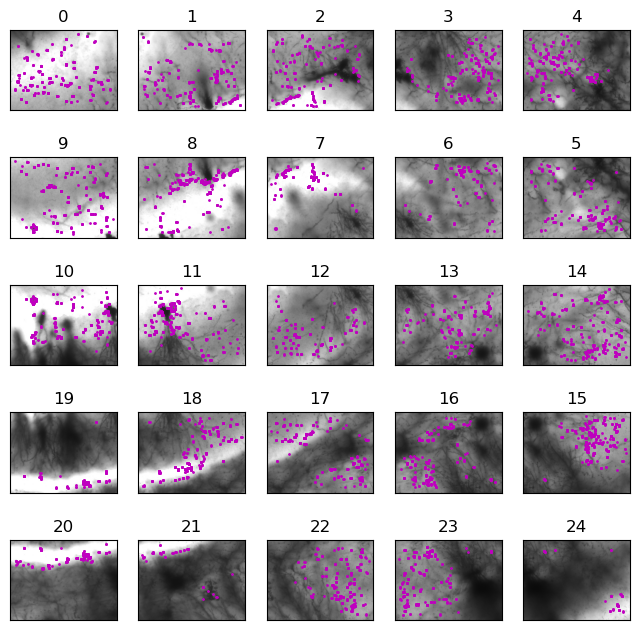

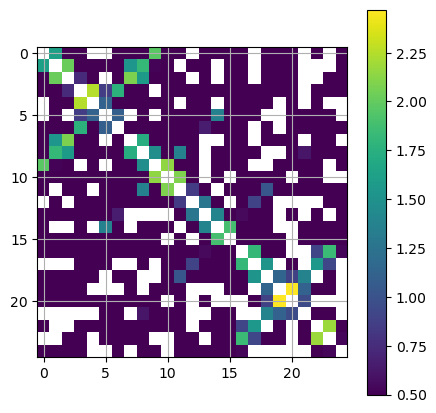

In [565]:
features = aff_stitcher.find_features(subset)


fig,ax=plt.subplots(5,5,figsize=(8,8))
ax = ax.flatten()
for i,(img,feat) in enumerate(zip(subset,features)):
    img_h = img.copy()
    # img_h[:,:,2] = plus_mask(img,n=.35)*255
    ax[order[i]].imshow(img_h)
    ax[order[i]].set_xticks([])
    ax[order[i]].set_yticks([])
    for k in feat.keypoints:
        ax[order[i]].scatter(k.pt[0],k.pt[1],s=1,color='m')
        ax[order[i]].set_title(i)

matches = aff_stitcher.match_features(features)
conf_mat = aff_stitcher.matcher.get_confidence_matrix(matches)
conf_mat[conf_mat==0]=np.nan
fig,ax=plt.subplots(1,figsize=(5,5))
cb=ax.imshow(conf_mat,vmin=0.5)
plt.colorbar(cb)
ax.grid('on')
np.nanmax(conf_mat,1)




In [501]:
cameras = aff_stitcher.camera_estimator.estimate(features, matches)
cameras = aff_stitcher.camera_adjuster.adjust(features, matches, cameras)
cameras = aff_stitcher.wave_corrector.correct(cameras)

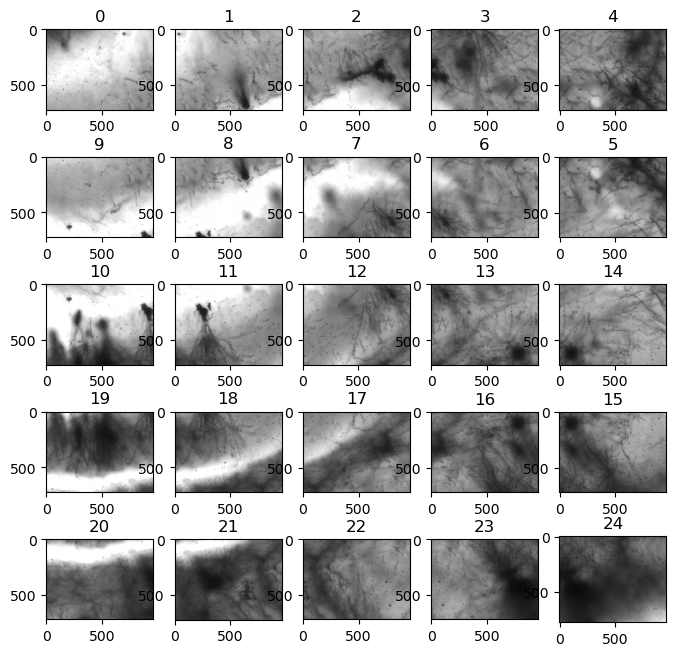

In [502]:

aff_stitcher.warper.set_scale(cameras)

# low_sizes = images.get_scaled_img_sizes(Images.Resolution.FINAL)
# camera_aspect = images.get_ratio(Images.Resolution.FINAL, Images.Resolution.FINAL)  # since cameras were obtained on medium imgs

# warped_low_imgs = list(aff_stitcher.warper.warp_images(low_imgs, cameras, camera_aspect))
# warped_low_masks = list(aff_stitcher.warper.create_and_warp_masks(low_sizes, cameras, camera_aspect))
# low_corners, low_sizes = aff_stitcher.warper.warp_rois(low_sizes, cameras, camera_aspect)


final_sizes = images.get_scaled_img_sizes(Images.Resolution.FINAL)
camera_aspect = images.get_ratio(Images.Resolution.FINAL, Images.Resolution.FINAL)

warped_final_imgs = list(aff_stitcher.warper.warp_images(final_imgs, cameras, camera_aspect))
warped_final_masks = list(aff_stitcher.warper.create_and_warp_masks(final_sizes, cameras, camera_aspect))
final_corners, final_sizes = aff_stitcher.warper.warp_rois(final_sizes, cameras, camera_aspect)


fig,ax=plt.subplots(5,5,figsize=(8,8))
ax = ax.flatten()
for i,img in enumerate(warped_final_imgs):
    ax[order[i]].imshow(img)
    # ax[order[i]].set_xticks([])
    # ax[order[i]].set_yticks([])
    ax[order[i]].set_title(i)

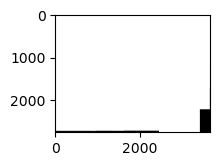

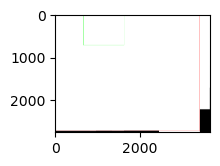

In [503]:
cropper = aff_stitcher.cropper
mask = cropper.estimate_panorama_mask(warped_low_imgs, warped_low_masks, low_corners, low_sizes)
plot_image(mask, (2,2))
lir = cropper.estimate_largest_interior_rectangle(mask)

plot = lir.draw_on(mask, size=2)
# plot_image(plot, (2,2))

low_corners = cropper.get_zero_center_corners(low_corners)
rectangles = cropper.get_rectangles(low_corners, low_sizes)
plot = rectangles[1].draw_on(plot, (0, 255, 0), 2)  # The rectangle of the center img
plot_image(plot, (2,2))
overlap = cropper.get_overlap(rectangles[1], lir)
plot = overlap.draw_on(plot, (255, 0, 0), 2)
# plot_image(plot, (5,5))


cropper.prepare(warped_low_imgs, warped_low_masks, low_corners, low_sizes)

cropped_low_masks = list(cropper.crop_images(warped_low_masks))
cropped_low_imgs = list(cropper.crop_images(warped_low_imgs))
low_corners, low_sizes = cropper.crop_rois(low_corners, low_sizes)

lir_aspect = images.get_ratio(Images.Resolution.FINAL, Images.Resolution.FINAL)  # since lir was obtained on low imgs
cropped_final_masks = list(cropper.crop_images(warped_final_masks, lir_aspect))
cropped_final_imgs = list(cropper.crop_images(warped_final_imgs, lir_aspect))
final_corners, final_sizes = cropper.crop_rois(final_corners, final_sizes, lir_aspect)

In [504]:
seam_finder = aff_stitcher.seam_finder

seam_masks = seam_finder.find(cropped_low_imgs, low_corners, cropped_low_masks)
seam_masks = [seam_finder.resize(seam_mask, mask) for seam_mask, mask in zip(seam_masks, cropped_final_masks)]

seam_masks_plots = [SeamFinder.draw_seam_mask(img, seam_mask) for img, seam_mask in zip(cropped_final_imgs, seam_masks)]


In [505]:
compensator = aff_stitcher.compensator

compensator.feed(low_corners, cropped_low_imgs, cropped_low_masks)

compensated_imgs = [compensator.apply(idx, corner, img, mask)
                    for idx, (img, mask, corner)
                    in enumerate(zip(cropped_final_imgs, cropped_final_masks, final_corners))]

In [526]:
def stack_snake(img_arr,row_n,col_n=None):
    img_arr=np.array(img_arr)
    if col_n is None: col_n=row_n
    X = np.arange(row_n*col_n).reshape(row_n,col_n)
    for r in np.arange(1,row_n,2):
        X[r,:] = X[r,::-1]

    cat_rows = [np.concatenate(img_arr[X[r,:]],axis=1) for r  in range(row_n)]
    concat = np.concatenate(cat_rows,axis=0)
    return concat


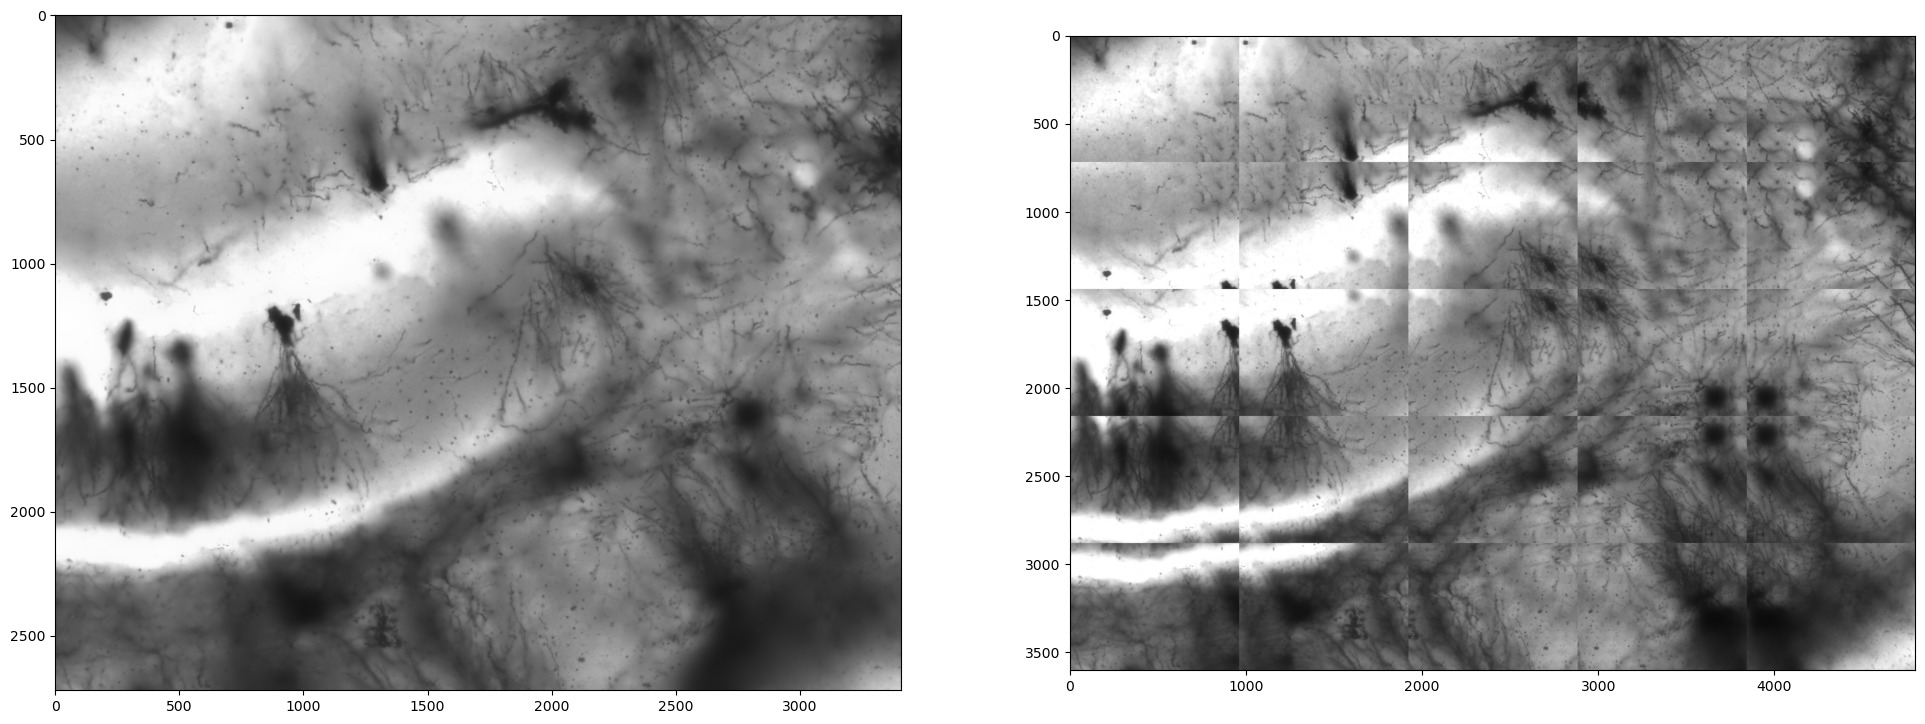

In [527]:


blender = aff_stitcher.blender
blender.prepare(final_corners, final_sizes)`
for img, mask, corner in zip(compensated_imgs, seam_masks, final_corners):
    blender.feed(img, mask, corner)
panorama, _ = blender.blend()


dm = 12
fig,ax=plt.subplots(1,2,figsize=(2*dm,dm*.75))
ax[0].imshow(panorama)
ax[1].imshow(stack_snake(subset,row_n=5))




In [ ]:
def aff_stitch_og_size(my_images,img_paths,r,c=None):


    images = Images.of(list(img_paths))
    medium_imgs = list(images.resize(Images.Resolution.FINAL))
    low_imgs = list(images.resize(Images.Resolution.FINAL))
    final_imgs = list(images.resize(Images.Resolution.FINAL))


    """ INIT Stitcher """
    settings = { "confidence_threshold": 1.2,"low_megapix":.7,'medium_megapix':.7}
    aff_stitcher = AffineStitcher(**settings)


    """ Feature Detection """
    features = aff_stitcher.find_features(my_images)
    ##
    fig,ax=plt.subplots(5,5,figsize=(8,8))
    ax = ax.flatten()
    for i,(img,feat) in enumerate(zip(my_images,features)):
        img_h = img.copy()
        # img_h[:,:,2] = plus_mask(img,n=.35)*255
        ax[order[i]].imshow(img_h)
        ax[order[i]].set_xticks([])
        ax[order[i]].set_yticks([])
        for k in feat.keypoints:
            ax[order[i]].scatter(k.pt[0],k.pt[1],s=1,color='m')
            ax[order[i]].set_title(i)

    """ Matching """
    matches = aff_stitcher.match_features(features)
    conf_mat = aff_stitcher.matcher.get_confidence_matrix(matches)
    conf_mat[conf_mat==0]=np.nan
    indicies = aff_stitcher.subsetter.get_indices_to_keep(features,matches)
    dot_notation = aff_stitcher.subsetter.get_matches_graph([str(i) for i in range(25)], matches)
    ##
    fig,ax=plt.subplots(1,figsize=(5,5))
    cb=ax.imshow(conf_mat,vmin=0.5)
    plt.colorbar(cb)
    ax.grid('on')
    np.nanmax(conf_mat,1)

    """ Solve Warp """
    cameras = aff_stitcher.camera_estimator.estimate(features, matches)
    cameras = aff_stitcher.camera_adjuster.adjust(features, matches, cameras)
    cameras = aff_stitcher.wave_corrector.correct(cameras)

    final_sizes = images.get_scaled_img_sizes(Images.Resolution.FINAL)
    camera_aspect = images.get_ratio(Images.Resolution.FINAL, Images.Resolution.FINAL)

    warped_final_imgs = list(aff_stitcher.warper.warp_images(final_imgs, cameras, camera_aspect))
    warped_final_masks = list(aff_stitcher.warper.create_and_warp_masks(final_sizes, cameras, camera_aspect))
    final_corners, final_sizes = aff_stitcher.warper.warp_rois(final_sizes, cameras, camera_aspect)
    ##
    fig,ax=plt.subplots(5,5,figsize=(8,8))
    ax = ax.flatten()
    for i,img in enumerate(warped_final_imgs):
        ax[order[i]].imshow(img)
        # ax[order[i]].set_xticks([])
        # ax[order[i]].set_yticks([])
        ax[order[i]].set_title(i)


    """ Cropping """
    lir_aspect = images.get_ratio(Images.Resolution.FINAL, Images.Resolution.FINAL)  # since lir was obtained on low imgs
    cropped_final_masks = list(cropper.crop_images(warped_final_masks, lir_aspect))
    cropped_final_imgs = list(cropper.crop_images(warped_final_imgs, lir_aspect))
    final_corners, final_sizes = cropper.crop_rois(final_corners, final_sizes, lir_aspect)

    """ Seams """
    seam_finder = aff_stitcher.seam_finder
    seam_masks = seam_finder.find(cropped_final_imgs, final_corners, cropped_final_masks)
    seam_masks_plots = [SeamFinder.draw_seam_mask(img, seam_mask) for img, seam_mask in zip(cropped_final_imgs, seam_masks)]

    """ Exposure Comp """
    compensator = aff_stitcher.compensator
    compensator.feed(low_corners, cropped_final_imgs, cropped_final_masks)
    compensated_imgs = [compensator.apply(idx, corner, img, mask)
                        for idx, (img, mask, corner)
                        in enumerate(zip(cropped_final_imgs, cropped_final_masks, final_corners))]

    """ Blend """
    blender = aff_stitcher.blender
    blender.prepare(final_corners, final_sizes)
    for img, mask, corner in zip(compensated_imgs, seam_masks, final_corners):
        blender.feed(img, mask, corner)
    panorama, _ = blender.blend()

    return panorama


In [567]:
panorama_func = aff_stitch_og_size(subset,single_plane_images,r=5)

TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'

Error in callback <function flush_figures at 0x0000014E7A6DA480> (for post_execute):



KeyboardInterrupt

